In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load mnist dataset
digit_data = tf.keras.datasets.mnist # 28x28 images of hand-written digits[0-9]
(x_train,y_train),(x_test,y_test) = digit_data.load_data() #separate data into train and test sets

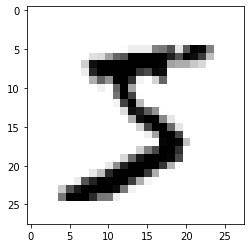

In [4]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show() # plot an example from the data

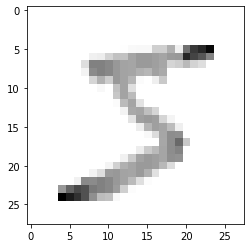

In [5]:
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show() # plot after normalizing the data

In [6]:
model = tf.keras.models.Sequential() # create model
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # flatten input for the first layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # adding 1st dense layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # adding 2nd dense layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # adding output layer, 10->number of output classes

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0729 - accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 

In [8]:
val_loss,val_accuracy = model.evaluate(x_test,y_test) # check accuracy for test data
print(val_loss,val_accuracy)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.0831 - accuracy: 0.9767
0.08312538266181946 0.9767000079154968


In [9]:
model.save('tf_mnist.model') # to save trained model 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

In [10]:
import numpy as np

In [11]:
saved_model = tf.keras.models.load_model('tf_mnist.model') # load the saved model
predictions = saved_model.predict([x_test]) # predict test values using the saved model
print(predictions[0]) # gives probability for all 10 classes
print(np.argmax(predictions[0])) # index for the highest probability

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[6.2444555e-10 1.3670130e-10 2.5932485e-07 5.1272551e-08 7.4721158e-12
 4.3003308e-08 2.5048842e-16 9.9999964e-01 3.4474110e-10 1.4215453e-07]
7


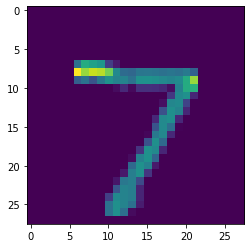

In [12]:
# prediction class for predictions[0] ->
# see actual class for test[0]
plt.imshow(x_test[0]) # Also y_test[0] -> 7
plt.show() # matches the prediciton